<a href="https://colab.research.google.com/github/jean-ntb/Pret_Machine_Learning/blob/main/Credit_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# importer les packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
# Je lis la base de données
Data_Frame = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [113]:
# Pouvoir naviguer dans toute la bdd
pd.set_option('display.max_rows',Data_Frame.shape[0]+1)

In [114]:
Data_Frame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [115]:
pd.set_option('display.max_rows',10)

In [116]:
Data_Frame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [117]:
# Voir toutes la valeurs manquantes

Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [118]:
Data_Frame.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
...,...
Loan_ID,0
CoapplicantIncome,0
ApplicantIncome,0
Property_Area,0


In [119]:
Data_Frame.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [120]:
# Renseigner les valeurs manquantes
# Pour la valeurs dites non numériques je vais tout simplement remplacer par les valeurs majoritaires


# Je sepere  les deux types de données
Categorie_Data = []
Numerique_Data = []

for i,c in enumerate(Data_Frame.dtypes):
  if c == object:
    Categorie_Data.append(Data_Frame.iloc[:,i])
  else:
    Numerique_Data.append(Data_Frame.iloc[:,i])

Categorie_Data = pd.DataFrame(Categorie_Data).transpose()
Categorie_Data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [121]:
Numerique_Data = pd.DataFrame(Numerique_Data).transpose()
Numerique_Data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [122]:
# Pour les variables categorique je remplace par les valeurs majoritaires

# fillna renseigne les valeurs manquantes
# donc je renseigne bien x.value_counts() pour remplacer par la valeur qui se répète le plus

Categorie_Data = Categorie_Data.apply(lambda x:x.fillna(x.value_counts().index[0]))
Categorie_Data.isnull().sum().any()

np.False_

In [123]:
# Pour les variables numériques cela va être un processsus différent
# Je remplace par la valeur précédente de la même colonne

Numerique_Data = Numerique_Data.fillna(method='bfill')
Categorie_Data.isnull().sum().any()

<ipython-input-123-5ed0d4e30948>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Numerique_Data = Numerique_Data.fillna(method='bfill')


np.False_

In [124]:
# Ma target est donc si oui ou non le crédit est accordé

Target_Value = {'Y' : 1, 'N' : 0}
Target = Categorie_Data['Loan_Status']
# Supression colonne
Categorie_Data.drop('Loan_Status',axis=1,inplace=True)
# Je remplace avec la méthode map
Target = Target.map(Target_Value)
Target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [125]:
# Je remplace les valuers categoriques par des booleans
# Pour celui qui se répète le plus dans la colonne 1 sinon 0

Le = LabelEncoder()
for i in Categorie_Data:
  Categorie_Data[i] = Le.fit_transform(Categorie_Data[i])
Categorie_Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [126]:
# Supprimmer loan id car inutile
Categorie_Data.drop('Loan_ID', axis=1, inplace=True)


In [127]:
# Concaténation de Categorie_Data et Numerique_Data
X = pd.concat([Categorie_Data,Numerique_Data],axis=1)
y = pd.DataFrame(Target)

In [128]:
# Definir la valeur de target

Target.value_counts()

,count
Loan_Status,
1,422
0,192


In [129]:
# La bdd utilisée pour EDA

Data_Frame = pd.concat([Categorie_Data, Numerique_Data, Target], axis=1)
Data_Frame

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

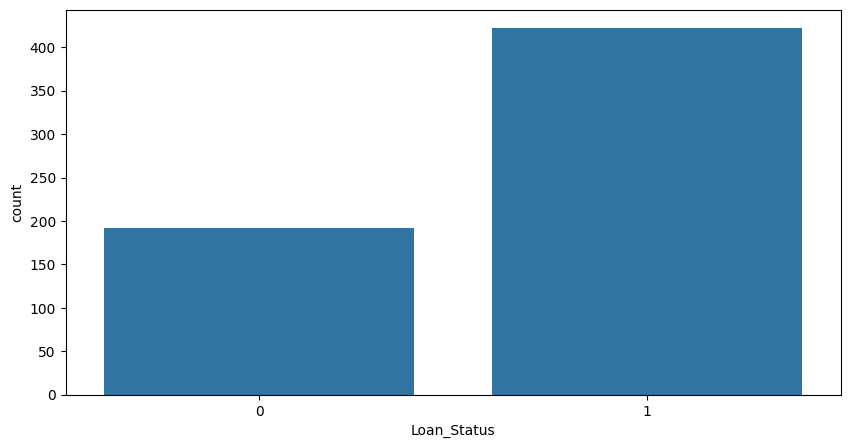

In [130]:
# Histogramme pour visualiser la target
plt.figure(figsize=(10,5))
sns.countplot(x=Target)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


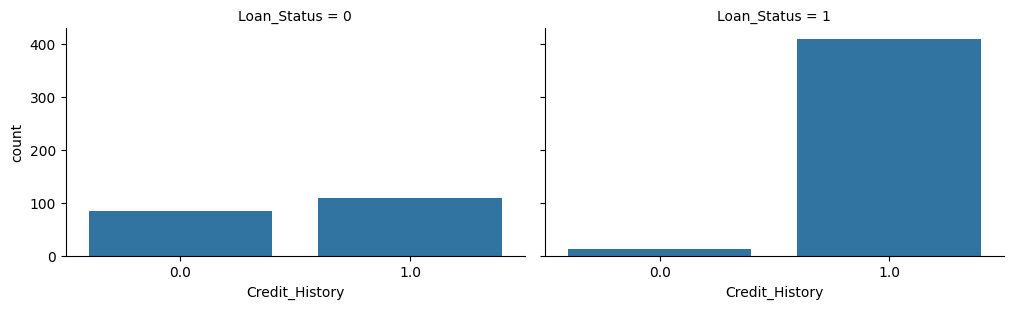

In [131]:
 # Credit history
grid = sns.FacetGrid(Data_Frame, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


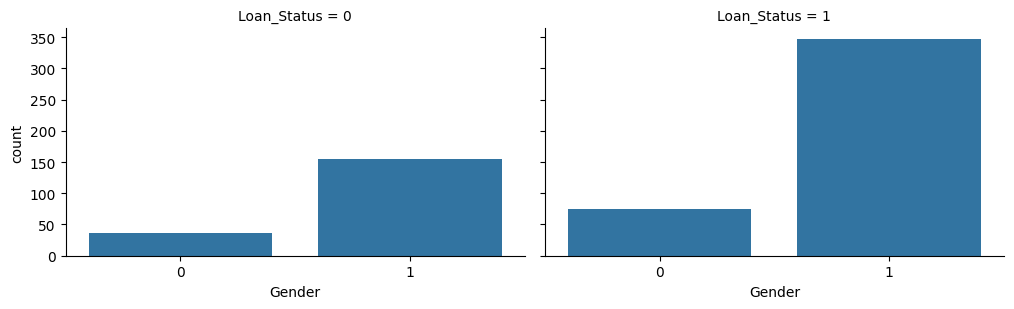

In [132]:
 # Pour le sexe
grid = sns.FacetGrid(Data_Frame, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


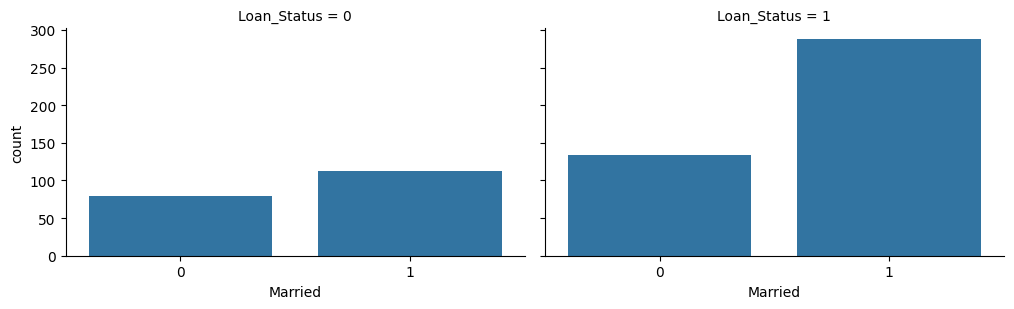

In [133]:
 # Credit history
grid = sns.FacetGrid(Data_Frame, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

Lorsqu'on a déjà un credit accépté on a plus de chances d'en avoir un d'accordé à nouveau.
Si on est de sexe masculin également



/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


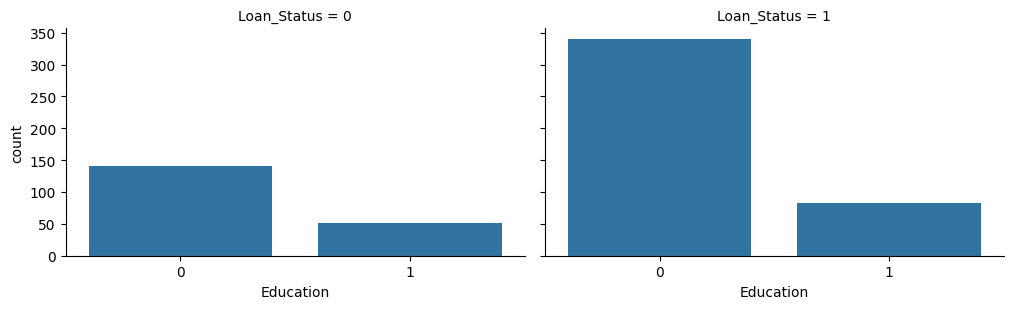

In [134]:
 # Credit history
grid = sns.FacetGrid(Data_Frame, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

In [135]:
# Impacte du revenu la

Data_Frame.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [147]:
# Je creer une nouvelle base de données avec les critères qui ont vraiment un impacte
X_2 = X[['Credit_History','Gender','CoapplicantIncome']]

In [148]:
# Separation en une bdd d'entrainement et une autre de test
SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in SSS.split(X_2, y):
  X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print('X_Train taille : ', X_train.shape)
print('X_Test taille : ', X_test.shape)
print('y_Train taille : ', y_train.shape)
print('y_Test taille : ', y_test.shape)

X_Train taille :  (491, 3)
X_Test taille :  (123, 3)
y_Train taille :  (491, 1)
y_Test taille :  (123, 1)


In [149]:
 # J'applique 3 models de machine learning pour les évaluers
 # Logistic regression, knn, DescisionTree
models = {
'LogisticRegression': LogisticRegression(random_state=42),
'KneighborsClassifier':KNeighborsClassifier(),
'DecisionTreeClassibier': DecisionTreeClassifier(max_depth = 1,random_state=42)

}

# La fonction de précision

def Accu(y_True, y_Pred,retu = False):
  acc = accuracy_score(y_True,y_Pred)
  if retu:
    return acc
  else :
    print(f'la precision du modèle est : {acc}')
# Fonction d'application des modèles

def train_test_eval(models,X_train,X_test,y_train,y_test):
  for name, model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    Accu(y_test,model.predict(X_test))
    print('_'*30)

train_test_eval(models,X_train,X_test,y_train,y_test)


LogisticRegression :
la precision du modèle est : 0.8536585365853658
______________________________
KneighborsClassifier :
la precision du modèle est : 0.6910569105691057
______________________________
DecisionTreeClassibier :
la precision du modèle est : 0.8455284552845529
______________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
